In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.cluster import KMeans

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Wise ML/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data['Species'].unique() ## Multiclass

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Figure size 1440x1440 with 0 Axes>

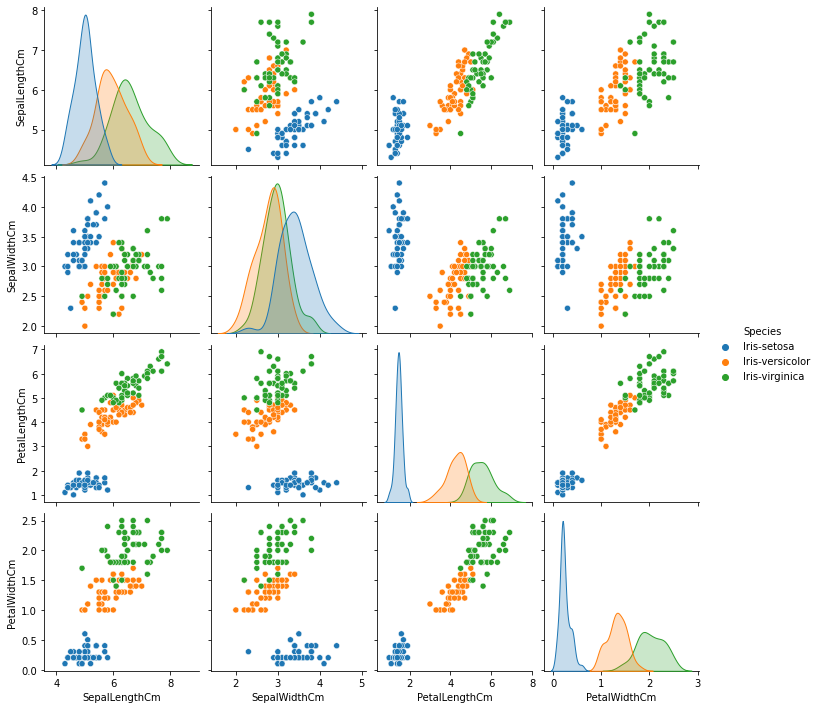

In [11]:
data = data.drop(['Id'], axis=1)
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='Species')
plt.show()
plt.close()

In [13]:
features = data.drop(['Species'], axis=1)
target = data['Species']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

**Logistic Reggression:**

In [14]:
logreg_model = LogisticRegression(max_iter=110, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [15]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 95.876%
Testing Accuracy: 100.000%


**K-Nearest Neighbours:**

In [16]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

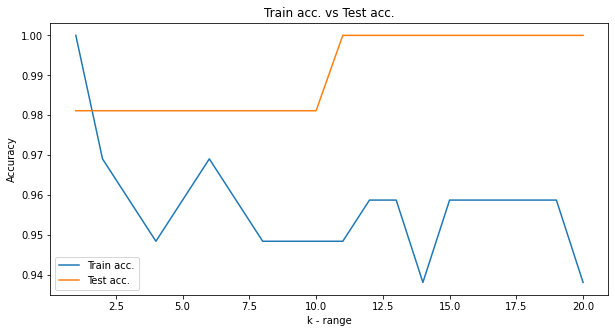

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 96.907%
Testing Accuracy: 98.113%


**DECISION TREES:**

**CART DT**

In [19]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 98.113%


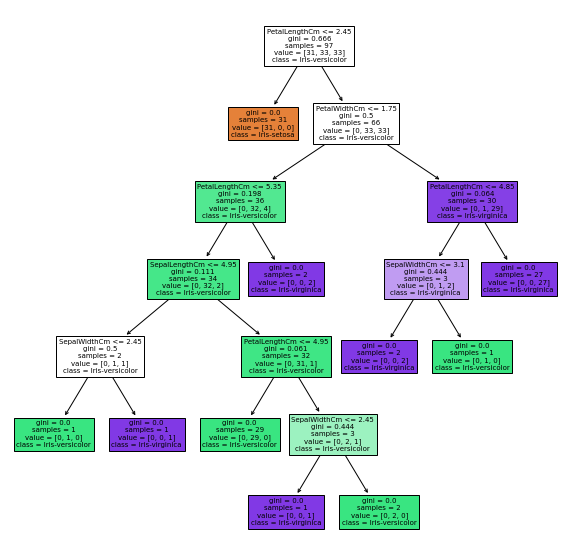

In [20]:
fig = plt.figure(figsize=(10, 10))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=data['Species'].unique())
plt.show()

**ID3 DT**

In [21]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 98.113%


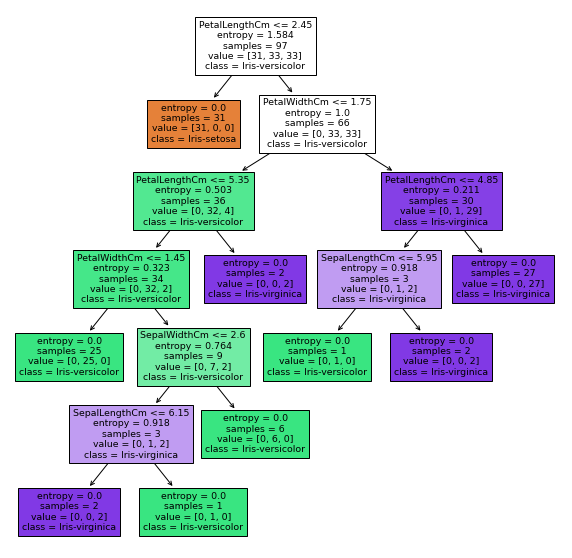

In [22]:
fig = plt.figure(figsize=(10, 10))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=data['Species'].unique())
plt.show()


**PCA:**

**Loading Datasets:**

In [23]:
data.shape


(150, 5)

**Extracting features and labels seperately:**

In [24]:
featurenames = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# separating features
features = data.loc[:,featurenames]

# separating target
labels = data.loc[:,'Species']

**Standardising Features:**

In [25]:
features = StandardScaler().fit_transform(features)


In [26]:
features

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

**Reducing 4D to 2D:**

In [27]:
import numpy as np
pca = PCA(n_components=2)

pct = pca.fit_transform(features)

print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])
display(principal_df)
finaldf = pd.concat([principal_df,labels],axis=1)

[0.72770452 0.95800975]


,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [28]:
print(principal_df)

          pc1       pc2
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]


In [29]:
display(finaldf)

,pc1,pc2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


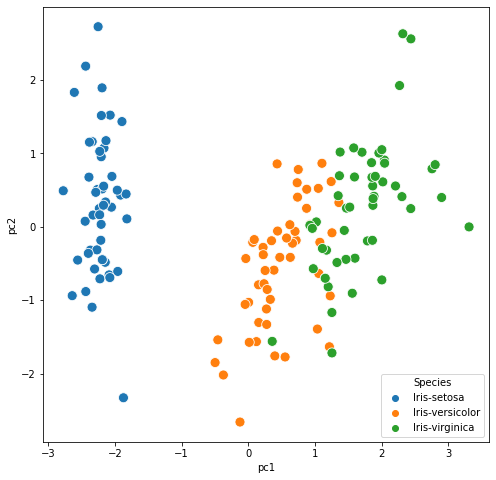

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot('pc1', 'pc2', hue='Species', data=finaldf, s=100)
plt.show()

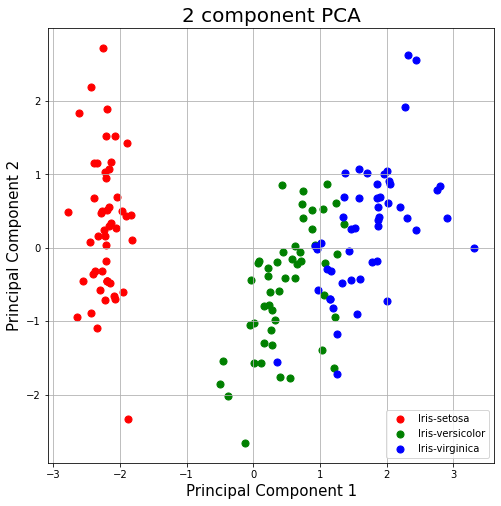

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = finaldf[['pc1', 'pc2']]
label = finaldf['Species']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.35, random_state=42, shuffle=True)
model = LogisticRegression()

model.fit(x_train, y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_pred)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)*100:.2f}")

Train Accuracy: 89.69
Test Accuracy: 92.45


In [33]:
x_train.shape

(97, 2)

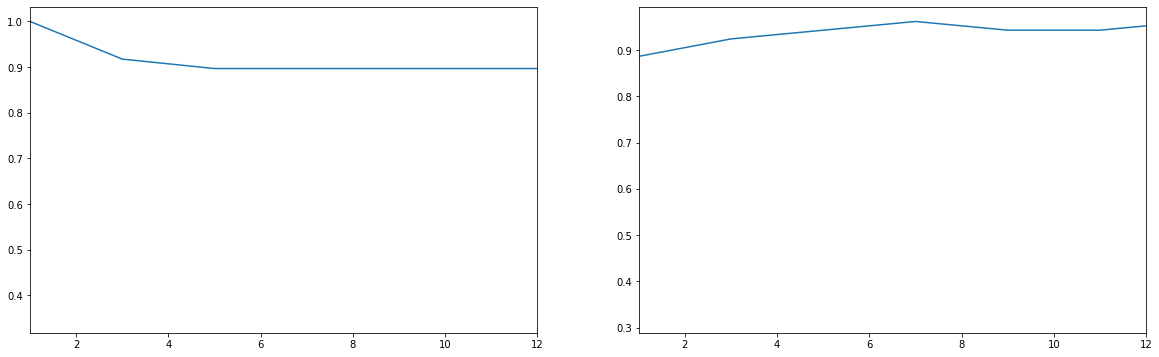

In [34]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []
k_range = list(range(1, 90, 2)) 

for k in k_range:
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(k_range, train_acc)
plt.xlim(1, 12)
plt.subplot(122)
plt.plot(k_range, test_acc)
plt.xlim(1, 12)
plt.show()


In [35]:
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)*100:.2f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)*100:.2f}")

Train accuracy: 35.05
Test accuracy: 32.08
